In [64]:
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

In [65]:
sns.color_palette('deep')
sns.set_style('white')

workdir = os.getcwd()
path = os.path.relpath('..\\..\\..\\results\\training_results\\', workdir)

LINEWIDTH = 1.5

In [66]:
# code for contents of plot

# filename = "1_successful_training_results_com_two_transitions_spaced_45_0deg_7_5nm_0_005decay.csv"
# filename = "2_successful_training_results_com_two_transitions_spaced_45_0deg_7_5nm_0_005decay_0_01random_chance.csv"
# filename = "training_results_com_random_spawning_two_transitions_spaced_45_0deg_7_5nm_0_005decay_0_01random_chance.csv"
filename = "training_results_com_random_spawning_two_transitions_360_0spaced_45_0deg_7_5nm_0_002decay_0_05random_chance.csv"
# filename = "training_results_com_constant_spawning_two_transitions_240_0spaced_45_0deg_7_5nm_0_002decay_0_05random_chance.csv"

file = os.path.join(path, filename)

data = []

with open(file) as f:
    csvreader = csv.reader(f)
    keys = next(csvreader)

    result = dict.fromkeys(keys)

    first = True

    for row in csvreader:

        if first:
            for key, item in zip(keys, row):
                if item.isdigit():
                    result[key] = [int(item)]
                else:
                    try:
                        result[key] = [float(item)]
                    except ValueError:
                        result[key] = [item]
            first = False
        else:
            for key, item in zip(keys, row):
                if item.isdigit():
                    result[key].append(int(item))
                else:
                    try:
                        result[key].append(float(item))
                    except ValueError:
                        result[key].append(item)

    loss_indices = [i for i, j in enumerate(result['loss']) if j != ""]
    loss_data = [result['loss'][x] for x in loss_indices]
    loss_episodes = [result['episode'][x] for x in loss_indices]

    actions = {'LEFT': result['action LEFT'], 'RIGHT': result['action RIGHT'], 'LNAV': result['action LNAV']}

## Loss

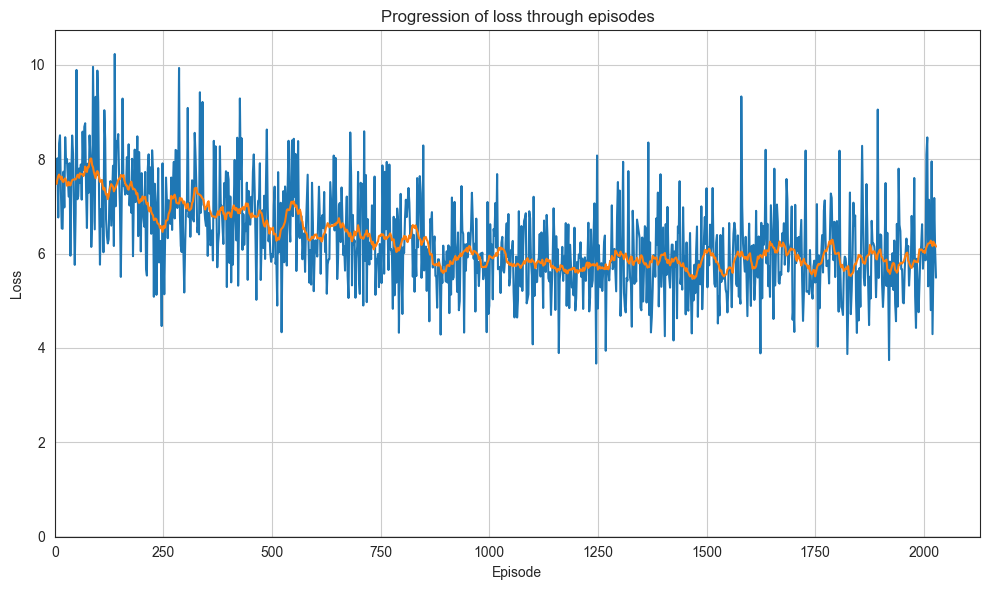

In [67]:
plt.figure(figsize=(10, 6), tight_layout=True)
plt.grid()
plt.axhline(y=0, linewidth=0.9, color="k")
sns.lineplot(x=loss_episodes, y=loss_data, linewidth=LINEWIDTH)
running_avg = uniform_filter1d(loss_data, 20)
sns.lineplot(x=loss_episodes, y=running_avg, linewidth=LINEWIDTH)
plt.xlim(0)
plt.ylim((min(0, min(loss_data) - 0.5), max(0, max(loss_data) + 0.5)))
plt.title("Progression of loss through episodes")
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.show()

## Reward

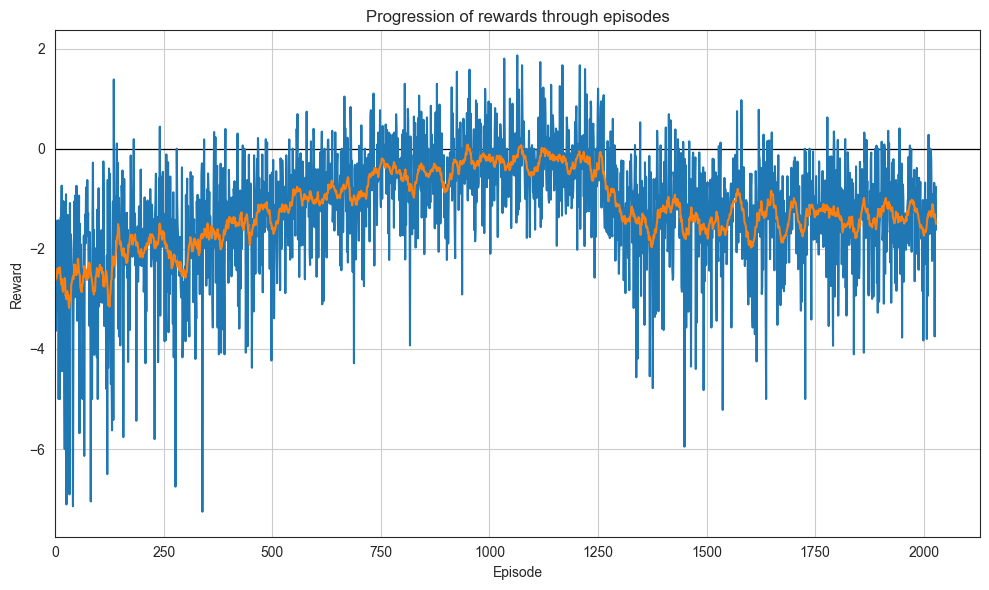

In [68]:
rewards = result['average reward']
plt.figure(figsize=(10, 6), tight_layout=True)
plt.grid()
plt.axhline(y=0, linewidth=0.9, color="k")
sns.lineplot(data=rewards, linewidth=LINEWIDTH)
running_avg = uniform_filter1d(rewards, 20)
sns.lineplot(data=running_avg, linewidth=LINEWIDTH)
plt.xlim(0)
plt.ylim((min(0, min(rewards) - 0.5), max(0, max(rewards) + 0.5)))
plt.title("Progression of rewards through episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

## Action Distribution

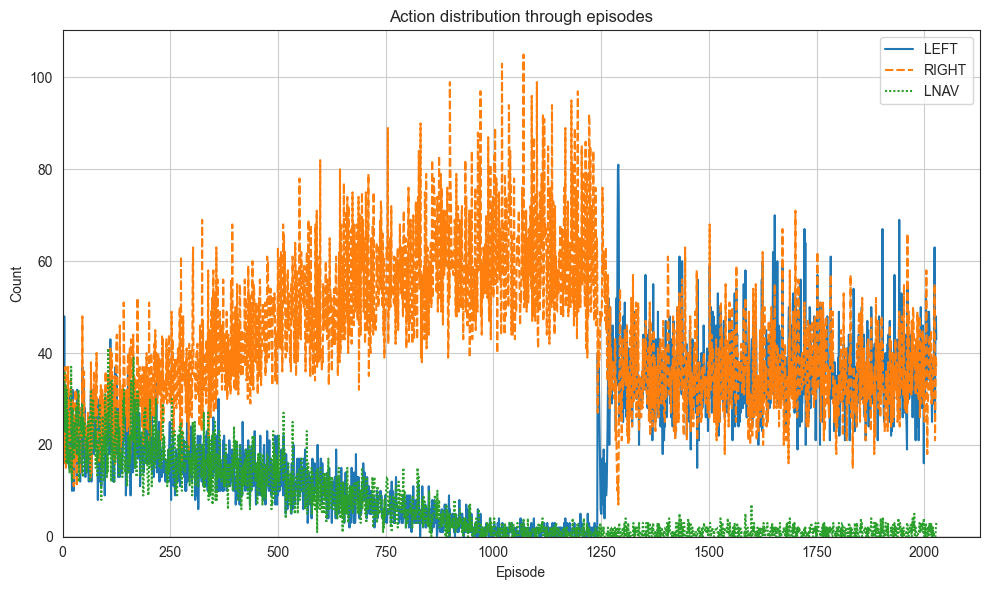

In [69]:
plt.figure(figsize=(10, 6), tight_layout=True)
plt.grid()
plt.axhline(y=0, linewidth=0.9, color="k")
sns.lineplot(data=actions, linewidth=LINEWIDTH)
plt.xlim(0)
plt.ylim(0)
plt.title("Action distribution through episodes")
plt.xlabel("Episode")
plt.ylabel("Count")
plt.show()

## Loss of Separation

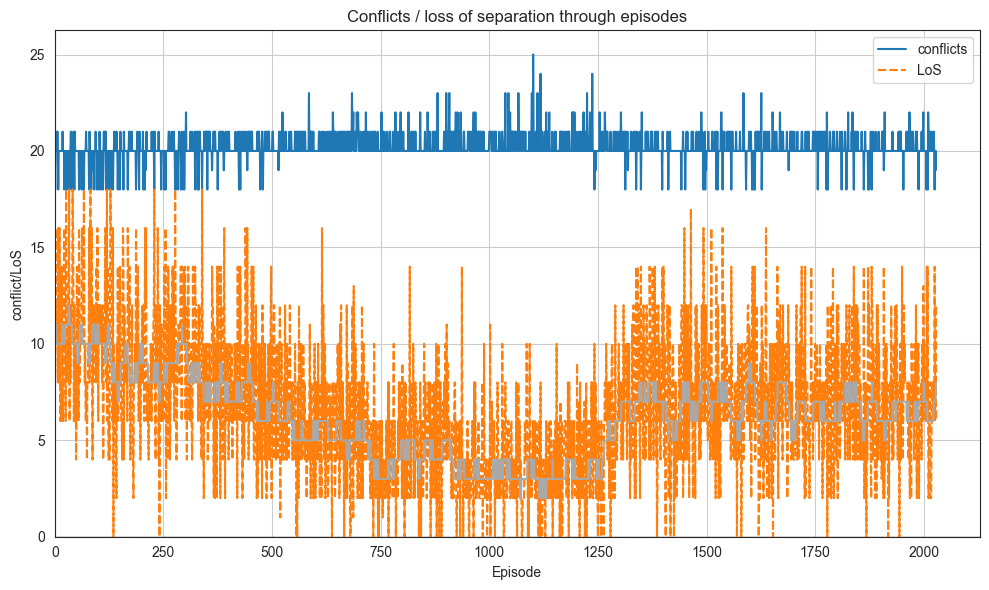

In [70]:
data = {"conflicts": result['conflicts'], "LoS": result['LoS']}
plt.figure(figsize=(10, 6), tight_layout=True)
# plotting
plt.grid()
plt.axhline(y=0, linewidth=0.9, color="k")
sns.lineplot(data=data, linewidth=LINEWIDTH)
running_avg = uniform_filter1d(data["LoS"], 20)
sns.lineplot(data=running_avg, linewidth=LINEWIDTH, color="darkgrey")
plt.xlim(0)
plt.ylim(0)
plt.title("Conflicts / loss of separation through episodes")
plt.xlabel("Episode")
plt.ylabel("conflict/LoS")
plt.show()